In [1]:
from random import randrange
import numpy as np
import pandas as pd
from keras.utils.vis_utils import plot_model

import os
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("Configurations"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("utils"))))
import Configurations
from utils import dataframeUtil
from utils import plotUtils


from matplotlib import pyplot as plt
from random import randrange

from tensorflow import keras
from utils import modelUtils

Configuration report:
Number of Subgroups is: 7
The Trend Simulation Formel is: x*1.3+10
main dir: ../


In [2]:
# get Training data
x, y, test_x, test_y = modelUtils.getTrainAndTestData()
neuralInputsNumber = Configurations.neuralInputsNumber
targetVarNumber = Configurations.numberOftargetVariables

In [10]:
ly=[4,3,2]
model = keras.Sequential([keras.layers.Input( shape=(neuralInputsNumber),name="Eingabeschicht")])
layernumber=1
for l in ly:
    name="Verborgene_schicht_"+str(layernumber)
    model.add(keras.layers.Dense(l, activation='relu',name=name))
    layernumber=layernumber+1


model.add(keras.layers.Dense(targetVarNumber, activation='sigmoid',name="Ausgabeschicht"))

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x, y, batch_size=16 ,epochs=30,validation_data=(test_x, test_y))

print("EVALUATION")
model.evaluate(test_x, test_y)
print(model.summary())

Verborgene_schicht_1
2
Verborgene_schicht_2
3
Verborgene_schicht_3
4
Epoch 1/30
313/313 [==============================] - 1s 1ms/step - loss: 0.5397 - accuracy: 0.2004 - val_loss: 0.4598 - val_accuracy: 0.2000
Epoch 2/30
313/313 [==============================] - 0s 810us/step - loss: 0.4102 - accuracy: 0.3396 - val_loss: 0.3581 - val_accuracy: 0.4300
Epoch 3/30
313/313 [==============================] - 0s 839us/step - loss: 0.3204 - accuracy: 0.4804 - val_loss: 0.2905 - val_accuracy: 0.5260
Epoch 4/30
313/313 [==============================] - 0s 847us/step - loss: 0.2757 - accuracy: 0.5630 - val_loss: 0.2633 - val_accuracy: 0.6172
Epoch 5/30
313/313 [==============================] - 0s 810us/step - loss: 0.2540 - accuracy: 0.6460 - val_loss: 0.2448 - val_accuracy: 0.6778
Epoch 6/30
313/313 [==============================] - 0s 788us/step - loss: 0.2380 - accuracy: 0.7150 - val_loss: 0.2306 - val_accuracy: 0.7874
Epoch 7/30
313/313 [==============================] - 0s 783us/step -

In [3]:
neuralInputsNumber = Configurations.neuralInputsNumber
targetVarNumber = Configurations.numberOftargetVariables

model = keras.Sequential([
    keras.layers.Input( shape=(neuralInputsNumber),name="Eingabeschicht"),
    keras.layers.Dense(75, activation='relu',name="Verborgene_schicht_1"),
    keras.layers.Dense(75,  activation='relu',name="Verborgene_schicht_2"),
    keras.layers.Dense(targetVarNumber, activation='sigmoid',name="Ausgabeschicht")])
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x, y, batch_size=16 ,epochs=30,validation_data=(test_x, test_y))

print("EVALUATION")
model.evaluate(test_x, test_y)

Epoch 1/30
313/313 [==============================] - 1s 1ms/step - loss: 0.2101 - accuracy: 0.7906 - val_loss: 0.0968 - val_accuracy: 0.9358
Epoch 2/30
313/313 [==============================] - 0s 1ms/step - loss: 0.0692 - accuracy: 0.9532 - val_loss: 0.0571 - val_accuracy: 0.9544
Epoch 3/30
313/313 [==============================] - 0s 995us/step - loss: 0.0474 - accuracy: 0.9640 - val_loss: 0.0450 - val_accuracy: 0.9610
Epoch 4/30
313/313 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9692 - val_loss: 0.0382 - val_accuracy: 0.9676
Epoch 5/30
313/313 [==============================] - 0s 984us/step - loss: 0.0327 - accuracy: 0.9740 - val_loss: 0.0335 - val_accuracy: 0.9720
Epoch 6/30
313/313 [==============================] - 0s 991us/step - loss: 0.0289 - accuracy: 0.9782 - val_loss: 0.0315 - val_accuracy: 0.9746
Epoch 7/30
313/313 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 0.9764 - val_loss: 0.0303 - val_accuracy: 0.9748


[0.02014475129544735, 0.9819999933242798]

In [4]:
predictions = model.predict(test_x)
accurancy,confusionMatrix,report = modelUtils.getMetric(predictions,test_y)
print(report)
g =test_x[0]
g=np.asanyarray([g])
print(g.shape)
print(g)
predictions = model.predict(np.asanyarray(g))
print(np.round(predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       0.99      1.00      1.00      1000
           2       0.98      0.98      0.98      1000
           3       0.98      0.98      0.98      1000
           4       0.97      0.96      0.96      1000

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

(1, 7)
[[ 0.52972181 -0.96243991 -0.05457018  0.93865561  0.05410844 -1.03414248
   1.50524562]]
[[0. 0. 0. 0. 1.]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1000
           1       0.99      1.00      1.00      1000
           2       0.89      0.91      0.90      1000
           3       0.93      0.96      0.94      1000
           4       0.88      0.82      0.85      1000

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Verborgene_schicht_1 (Dense  (None, 4)                32        
 )                                                               
                                                                 
 Verborgene_schicht_2 (Dense  (None, 3)                15        
 )                                                               
                           

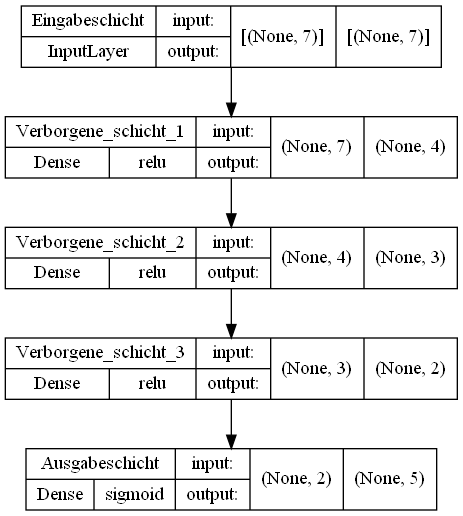

In [11]:
predictions = model.predict(test_x)
accurancy,confusionMatrix,report = modelUtils.getMetric(predictions,test_y)
print(report)
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,show_layer_activations=True)

[0.21010158956050873, 0.06915275752544403, 0.04736696928739548, 0.03798392787575722, 0.03270262852311134, 0.02890428528189659, 0.02721475437283516, 0.024606764316558838, 0.023618729785084724, 0.022070040926337242, 0.02051164209842682, 0.019956253468990326, 0.01859239488840103, 0.018394505605101585, 0.0170143973082304, 0.016399500891566277, 0.015614114701747894, 0.014803445897996426, 0.014099943451583385, 0.013626626692712307, 0.013402920216321945, 0.011964229866862297, 0.012037121690809727, 0.012227102182805538, 0.011236007325351238, 0.010936163365840912, 0.009798730723559856, 0.010128356516361237, 0.009536427445709705, 0.0088559091091156]


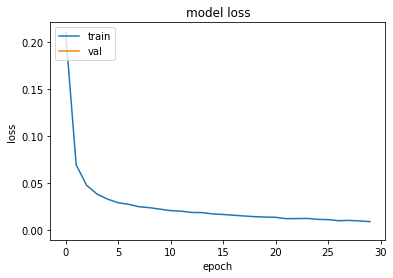

In [7]:
plt.plot(history.history['loss'])
tmp = history.history['loss']
print(tmp)
tmp=[0.21010158956050873, 0.06915275752544403, 0.04736696928739548, 0.03798392787575722, 0.03270262852311134, 0.02890428528189659, 0.02721475437283516, 0.024606764316558838, 0.023618729785084724, 0.022070040926337242, 0.02051164209842682, 0.019956253468990326, 0.01859239488840103, 0.018394505605101585, 0.0170143973082304, 0.016399500891566277, 0.015614114701747894, 0.014803445897996426, 0.014099943451583385, 0.013626626692712307, 0.013402920216321945, 0.011964229866862297, 0.012037121690809727, 0.012227102182805538, 0.011236007325351238, 0.010936163365840912, 0.009798730723559856, 0.010128356516361237, 0.009536427445709705, 0.0088559091091156]
plt.plot([0])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('plots/{}'.format("val"), dpi=300)
plt.show()

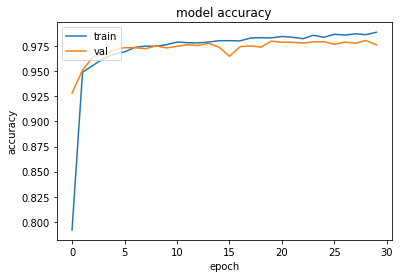

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [7]:
#model.save('../'+Configurations.model_output_path+'dnn_model')
#model = keras.models.load_model('../model/generalsMoldel')

INFO:tensorflow:Assets written to: ../saved_model/dnn_model/assets


In [8]:
model.evaluate(test_x, test_y)
y_pred=model.predict(test_x)
#y_pred = np.round(y_pred)
kbacc = keras.metrics.BinaryAccuracy()
_ = kbacc.update_state(test_y, y_pred)
print(f'Keras BinaryAccuracy acc: {kbacc.result().numpy()*100:.3}')

kacc = keras.metrics.Accuracy()
_ = kacc.update_state(test_y, y_pred)
print(f'Keras Accuracy acc: {kacc.result().numpy()*100:.3}')

157/157 [==============================] - 1s 5ms/step
Keras BinaryAccuracy acc: 99.0
Keras Accuracy acc: 5.25


1/1 [==============================] - 0s 149ms/step
0.0000159731  0.0000000062  0.9999793768  0.0000000000 
Prediction [[0. 0. 1. 0. 0.]]
Should be  [[0. 0. 1. 0. 0.]]
True
intercept:  -0.3000653055438969


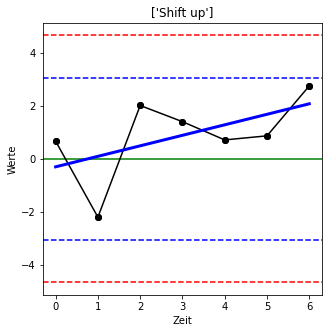

In [9]:
a = randrange(0,len(test_x))
b = a+1

prediction = model.predict(test_x[a:b])
print("%.10f " % prediction[0][0],"%.10f " % prediction[0][1],"%.10f " % prediction[0][2],"%.10f " % prediction[0][3])

prediction = modelUtils.roundPredictionsResults(prediction)
print("Prediction", prediction)
print("Should be ", test_y[a:b])

isPredectionTrue = all((test_y[a:b] == prediction)[0])
print(isPredectionTrue)
detections = modelUtils.getDetectionLabel_for_4y(prediction)
plotUtils.plotChart(test_x[a:b][0],detections)
slope,intercept = plotUtils.plotSlope(test_x[a:b][0])
print("intercept: ",intercept)


In [10]:
wrongClassificationsCharts,shouldClassifications = modelUtils.getFalseClassifications(model,test_x=test_x,test_y=test_y)
chart_number = 0

1/1 [==============================] - 0s 25ms/step
False Predictions Number:  119  from:  5000


In [11]:
df,duplicates_count_df = modelUtils.getFalseClassificationsReport(model,wrongClassificationsCharts,shouldClassifications)
duplicates_count_df

1/1 [==============================] - 0s 27ms/step


ValueError: too many values to unpack (expected 2)

In [ ]:
wrongResults =[]
def plotWrongChart():
    chart = wrongClassificationsCharts[chart_number:chart_number+1]
    prediction = model.predict(chart)
    print("%.10f " % prediction[0][0],"%.10f " % prediction[0][1],"%.10f " % prediction[0][2],"%.10f " % prediction[0][3])
    prediction = modelUtils.roundPredictionsResults(prediction)
    print("Prediction", prediction)
    print("Should be ", shouldClassifications[chart_number:chart_number+1])
    prediction_label = modelUtils.getDetectionLabel_5(prediction)
    soll_prediction_label = modelUtils.getDetectionLabel_5(shouldClassifications[chart_number:chart_number+1])
    msg= str(prediction_label)+" vs "+str(soll_prediction_label)
    plotUtils.plotChart(chart[0],msg)
    slope,intercept = plotUtils.plotSlope(chart[0])
    wrongResults.append(msg)
    print(msg)
    print("intercept: ",intercept)
    print("slope: ",slope)
    
  


0.0000000005  0.0000002186  0.0000000015  0.9971616864 
Prediction [[0. 0. 0. 1. 0.]]
Should be  [[0 0 0 0 1]]
['shiftDown'] vs ['natural']
intercept:  0.18855578345911844
slope:  -0.1889480288539614
0.0000000067  0.7686962485  0.0000000000  0.4939294755 
Prediction [[0. 1. 0. 0. 0.]]
Should be  [[0 0 0 1 0]]
['trendDown'] vs ['shiftDown']
intercept:  0.02057360219103921
slope:  -0.469284744134971
0.0000000004  0.0000013234  0.0000000000  0.9269922972 
Prediction [[0. 0. 0. 1. 0.]]
Should be  [[0 0 0 0 1]]
['shiftDown'] vs ['natural']
intercept:  -0.4050159997173718
slope:  -0.11023303334202086
0.0000000000  0.0000000079  0.0000000000  0.9970915318 
Prediction [[0. 0. 0. 1. 0.]]
Should be  [[0 0 0 0 1]]
['shiftDown'] vs ['natural']
intercept:  -0.554288883294378
slope:  0.008451570357595169
0.7292838097  0.0000000039  0.5090013742  0.0000000000 
Prediction [[1. 0. 1. 0. 0.]]
Should be  [[0 0 1 0 0]]
['trendUp'] vs ['shiftUp']
intercept:  -0.08993381687572977
slope:  0.48122625265802643

d:\projekts\control-chart\utils\plotUtils.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, figsize=(figsize, 5), sharex=True)


['shiftUp'] vs ['natural']
intercept:  0.1452370222125735
slope:  0.062308624386787394
0.0000000007  0.0000000114  0.9810149670  0.0001818240 
Prediction [[0. 0. 1. 0. 0.]]
Should be  [[0 0 0 0 1]]
['shiftUp'] vs ['natural']
intercept:  0.4449286088347434
slope:  -0.09649638299431117
0.0000000000  0.0000000032  0.9991044998  0.0000000200 
Prediction [[0. 0. 1. 0. 0.]]
Should be  [[0 0 0 0 1]]
['shiftUp'] vs ['natural']
intercept:  0.7378841745001928
slope:  -0.17825879156589505
0.0000000321  0.0000000277  0.9966056943  0.0000251329 
Prediction [[0. 0. 1. 0. 0.]]
Should be  [[0 0 0 0 1]]
['shiftUp'] vs ['natural']
intercept:  -0.249609751892941
slope:  0.1714495862168924
0.0000000021  0.0000000041  0.5887689590  0.0000068323 
Prediction [[0. 0. 1. 0. 1.]]
Should be  [[0 0 0 0 1]]
['shiftUp'] vs ['natural']
intercept:  0.1234919806676251
slope:  0.022779289633035677
0.0000000000  0.0000000023  0.3795111775  0.0000005204 
Prediction [[0. 0. 0. 0. 0.]]
Should be  [[0 0 1 0 0]]
['trendUp'] 

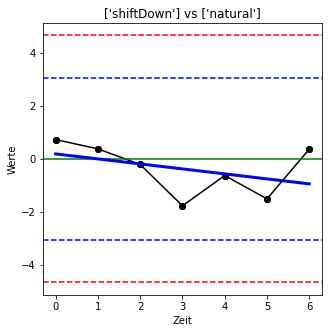

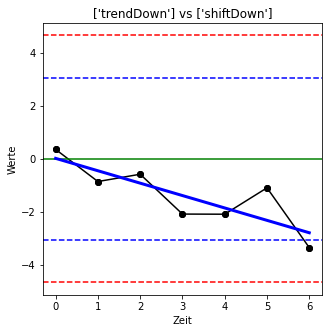

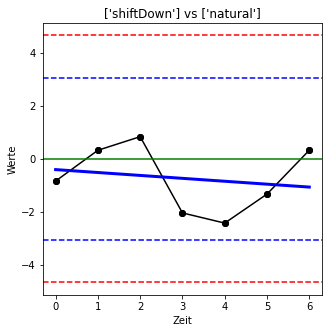

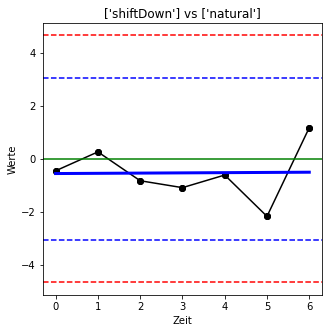

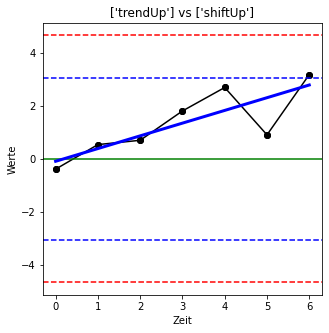

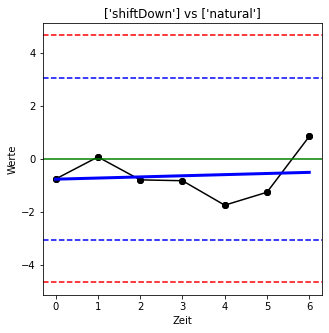

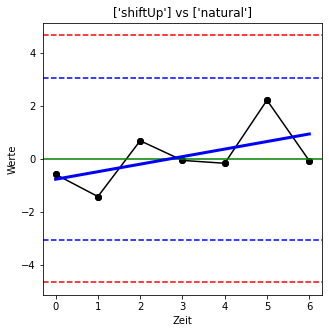

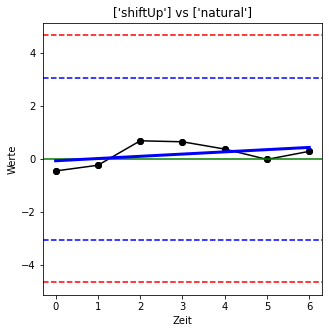

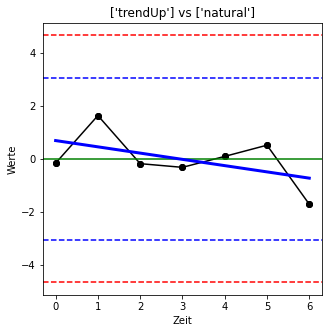

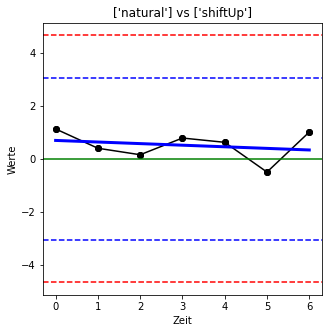

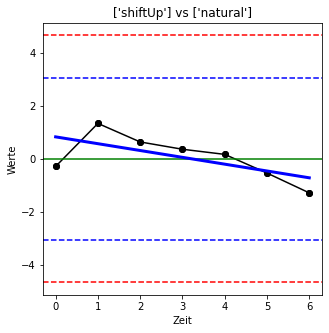

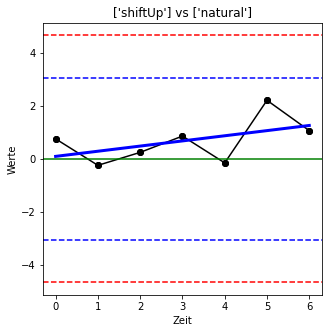

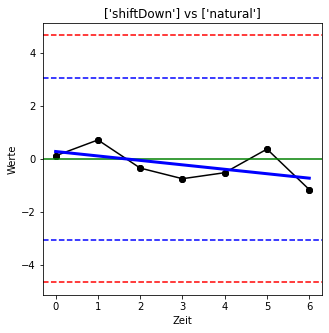

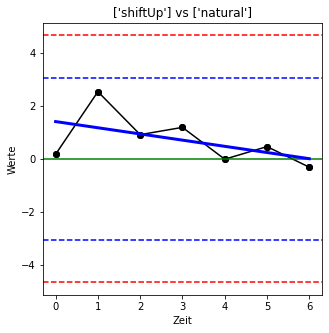

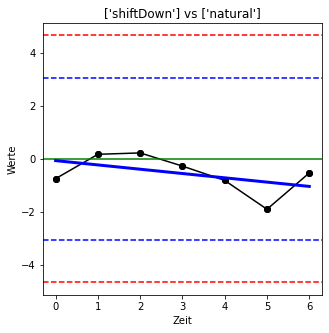

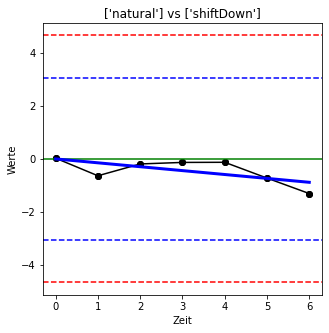

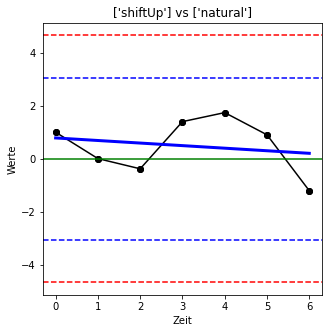

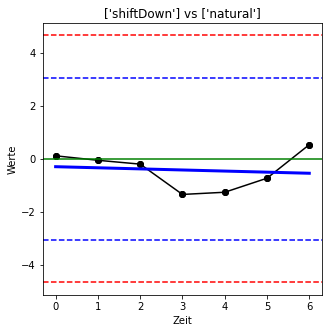

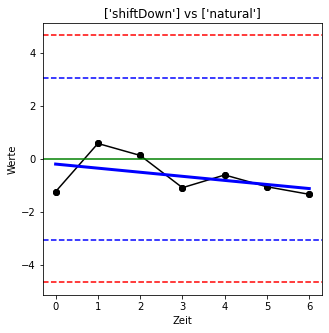

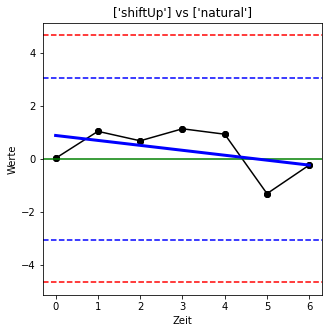

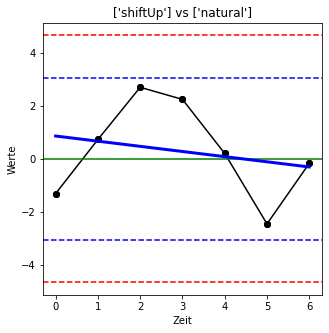

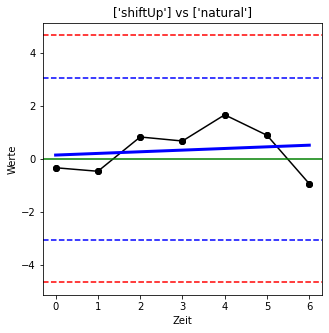

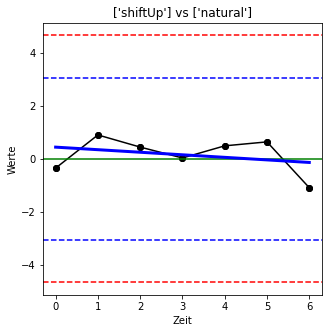

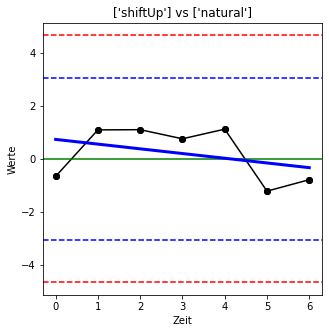

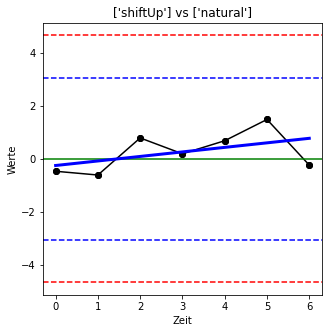

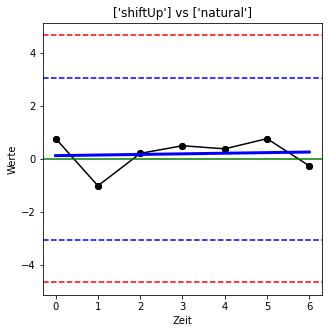

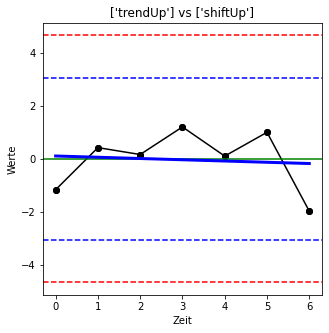

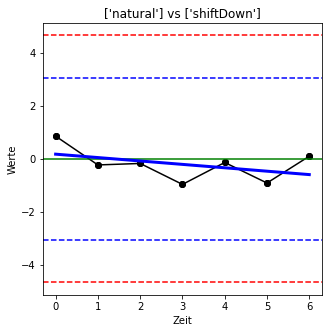

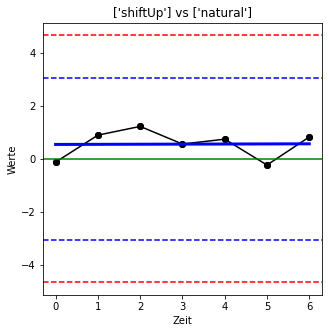

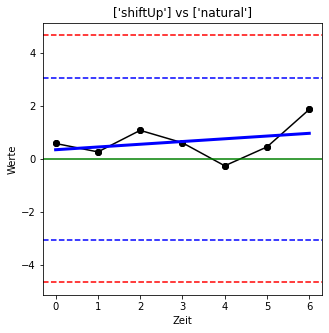

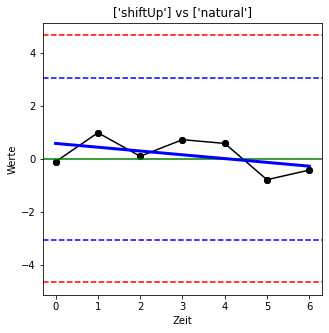

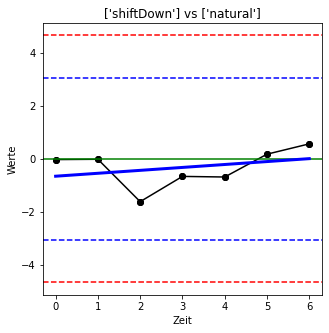

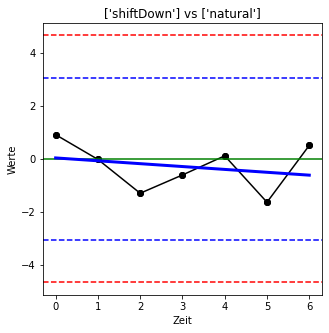

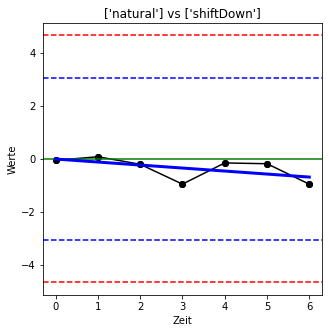

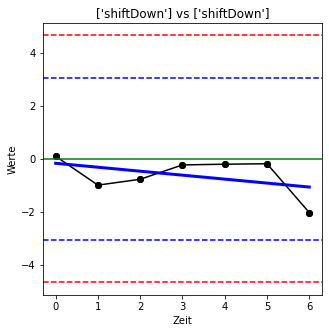

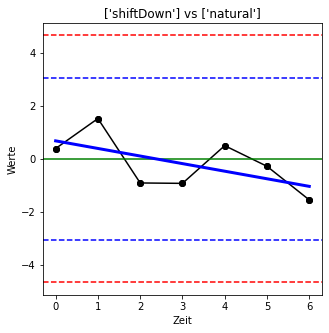

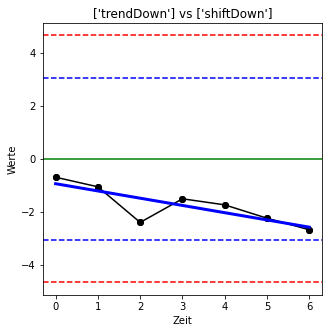

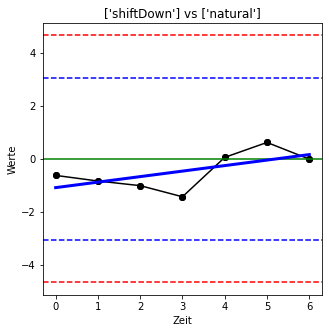

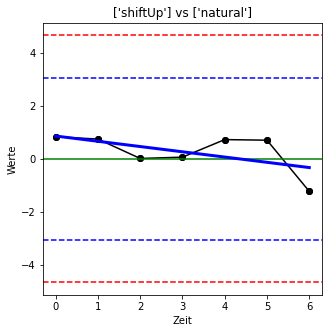

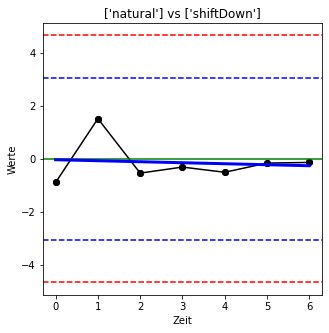

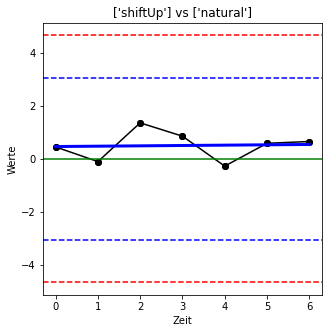

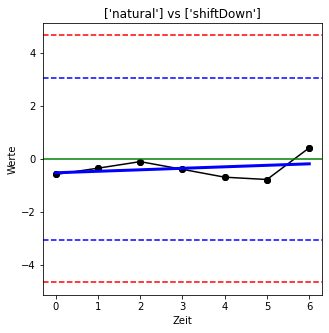

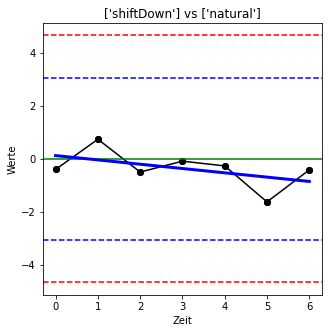

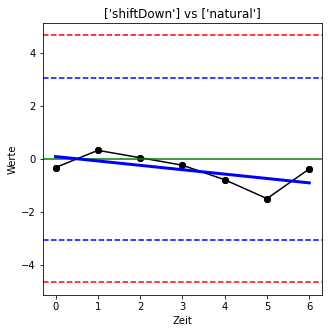

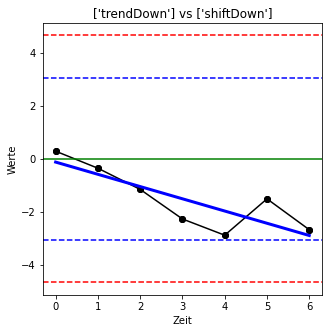

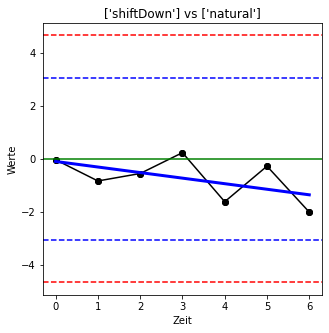

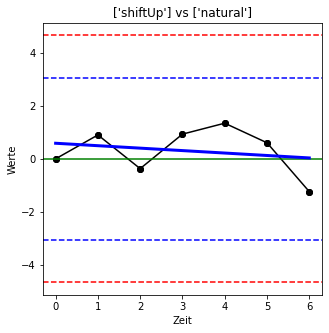

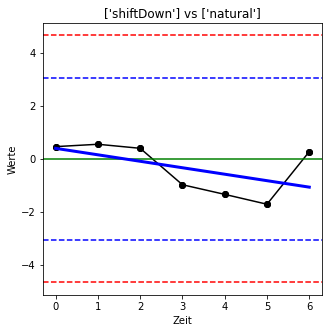

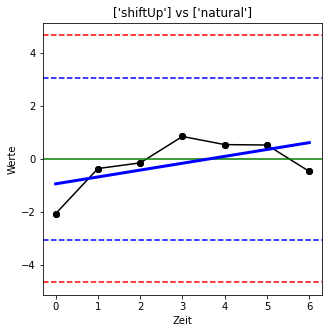

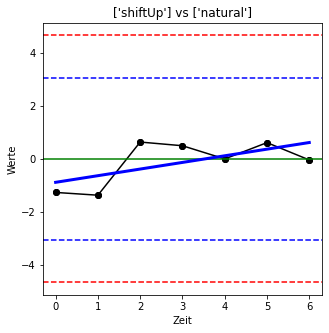

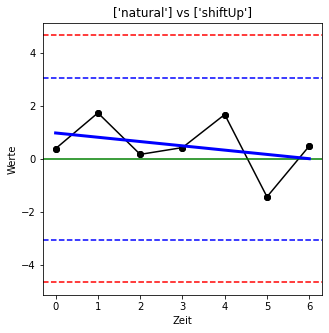

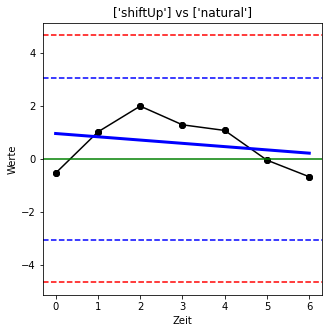

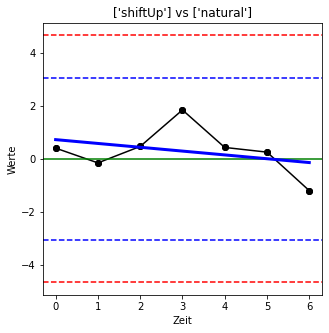

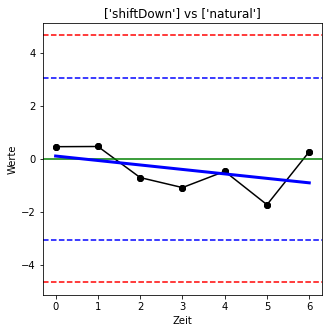

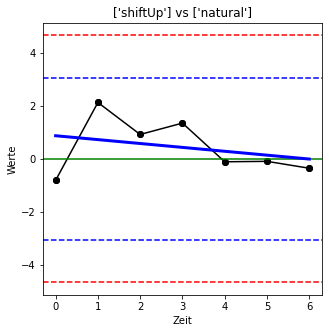

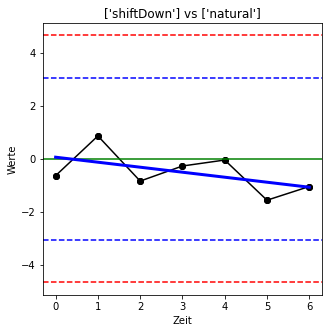

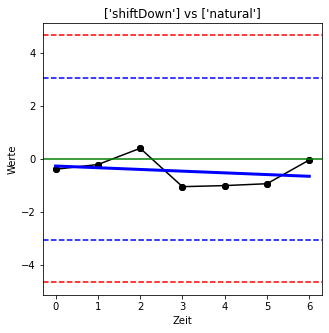

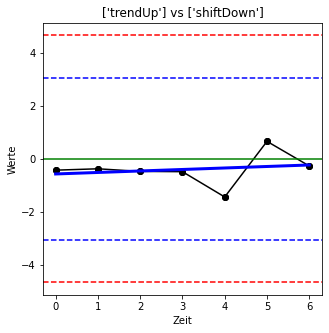

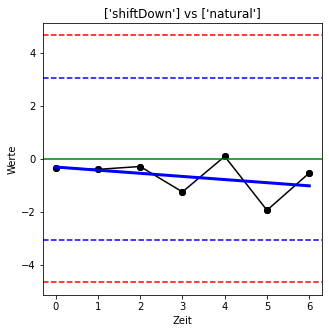

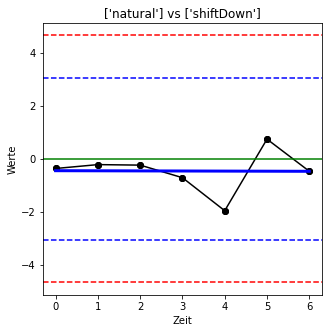

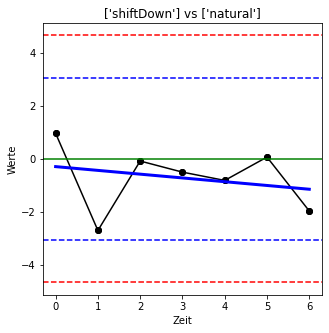

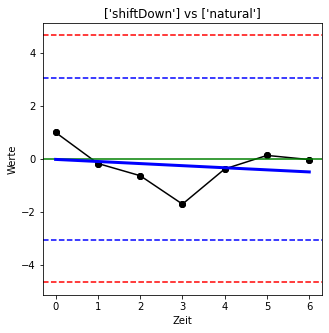

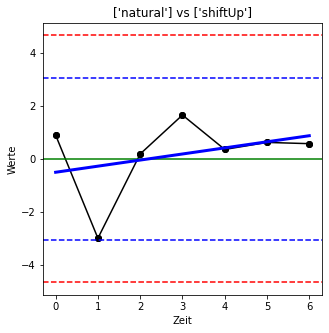

In [ ]:
#chart_number =0
for e in range(len(wrongClassifications)-1):
    plotWrongChart()
    chart_number = chart_number+1
print(wrongResults)

intercept:  1.2519772052764893
slope:  0.2582711696624756


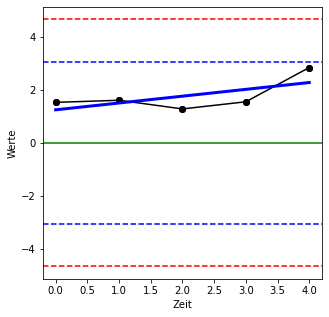

In [ ]:
plotUtils.plotChart(chart[0][2:7],"")
slope,intercept = plotUtils.plotSlope(chart[0][2:7])
print("intercept: ",intercept)
print("slope: ",slope)

In [ ]:

onlineSimulation=test_x.flatten()
windowSize=10
outputSize = Configurations.neuralInputsNumber
index = 0


  Trend up      Trend down  
0.0003317595  0.0002584457 
Prediction [[0. 0. 0. 1.]]


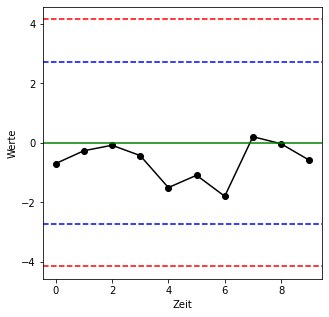

In [ ]:

output= [onlineSimulation[index:index+outputSize]]
output = np.array(output)
prediction = model.predict(output)
print("  Trend up " ,"    Trend down  " )
print("%.10f " % prediction[0][0],"%.10f " % prediction[0][1])
prediction = np.round(prediction)
print("Prediction", prediction)
#plotUtils.plotChart(output[0], "detection")
plotUtils.plotChartWith2Detection(output[0],prediction,"Trend up","Trend down")
index = index + windowSize